## Importing Modules

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import load_img
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D
from tensorflow.python.keras.utils.np_utils import to_categorical

from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications.vgg19 import VGG19

## Load Dataset

In [3]:
BASE_DIR = '/kaggle/input/utkface-new/UTKFace/'

In [4]:
# labels = age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
# convert to dataframe
df= pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1


In [6]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

## Exploratory Data Analysis

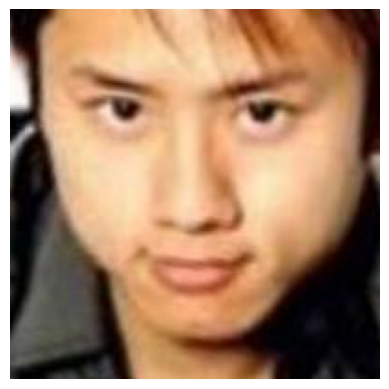

In [7]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)

<AxesSubplot:xlabel='age', ylabel='Density'>

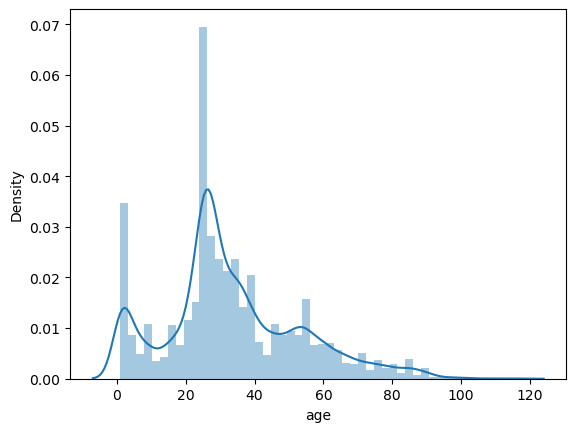

In [8]:
sns.distplot(df['age'])

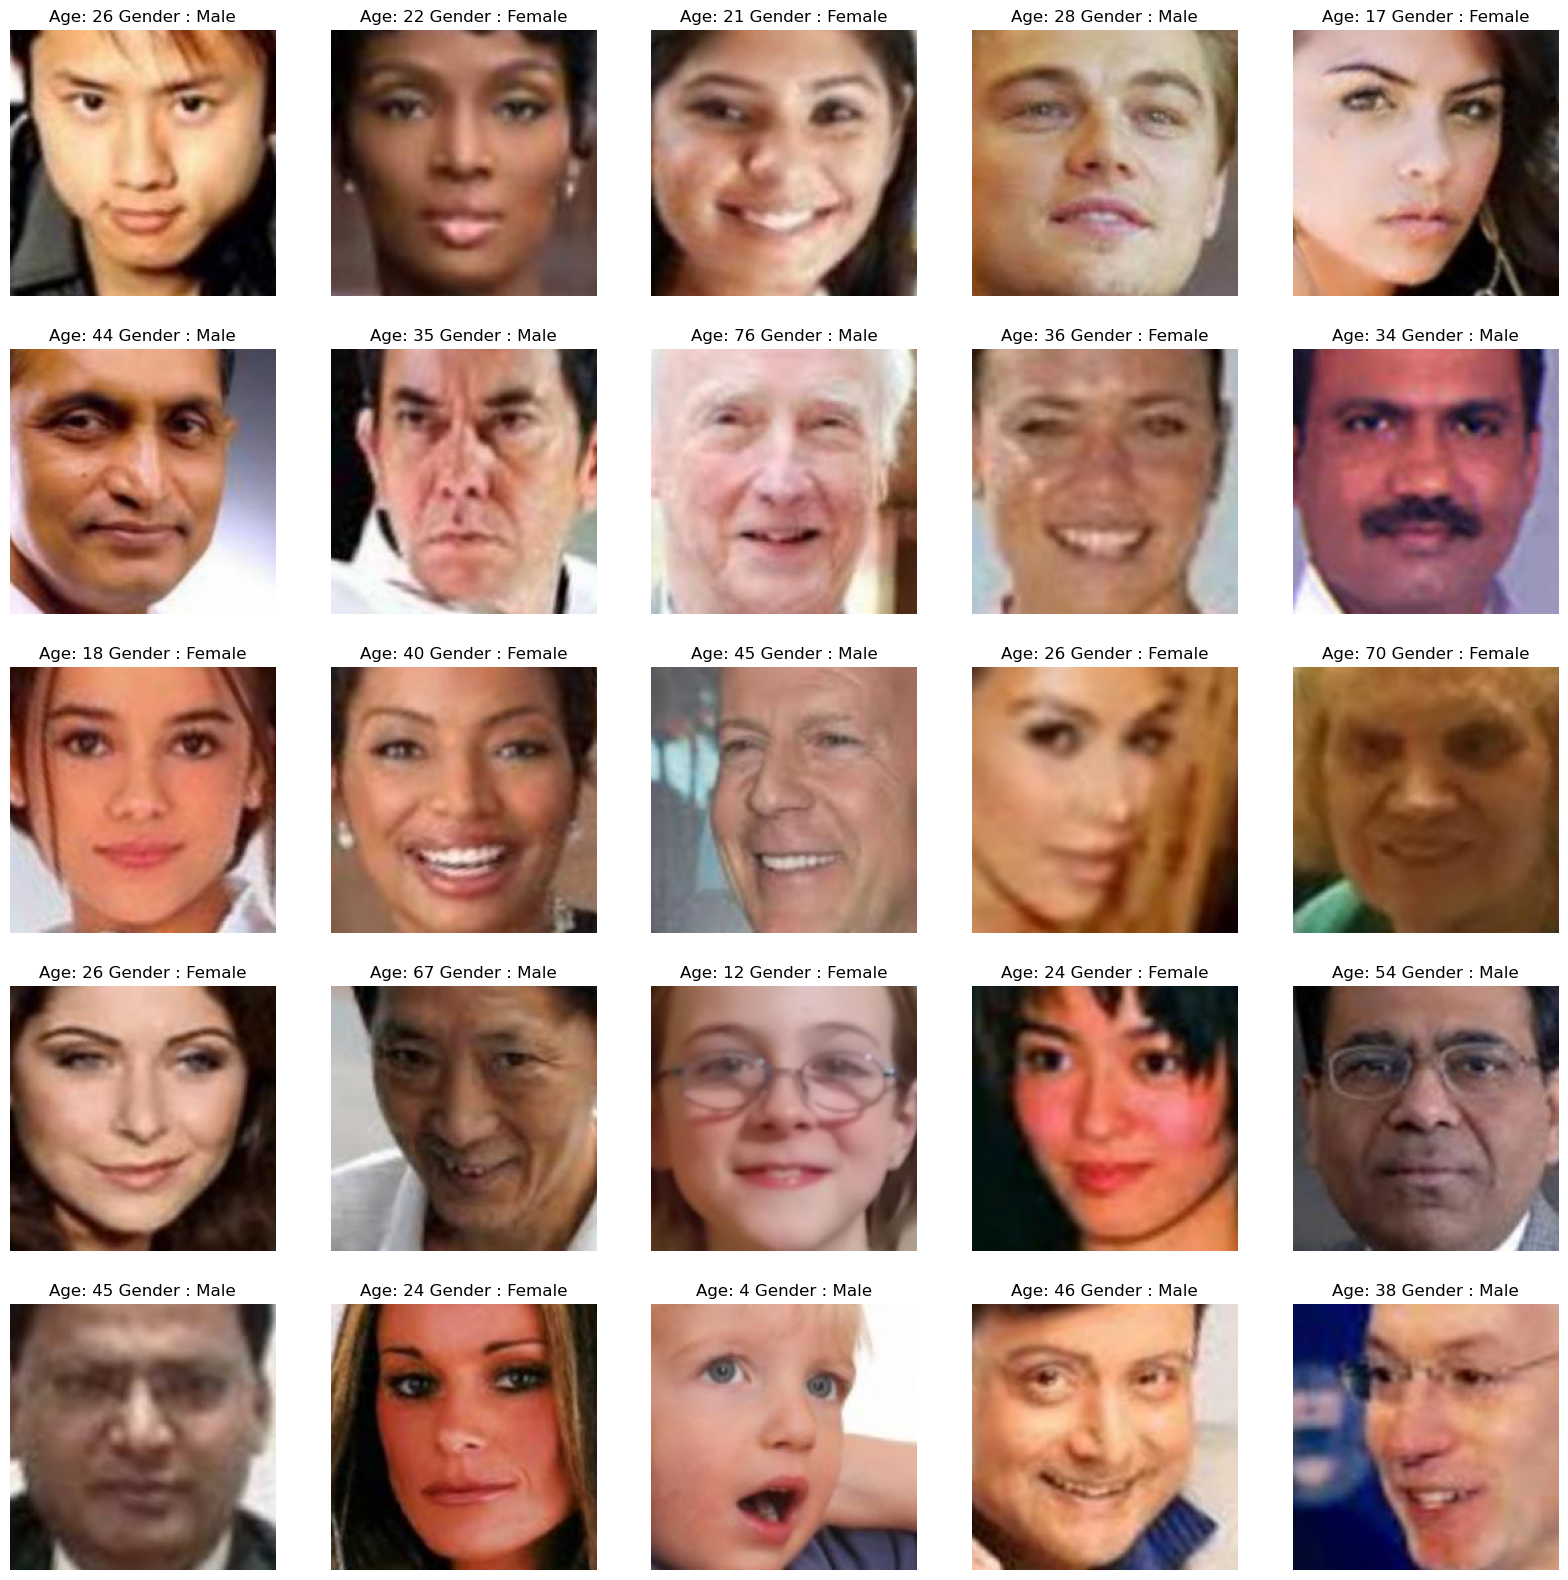

In [9]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender : {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [13]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train_gender, y_test_gender, y_train_age, y_test_age = train_test_split(
    X,df['gender'].values,df['age'].values,test_size=0.1, random_state=1234)

In [16]:
#use model to make predictions on test data
y_pred = logistic_regression.predict(x_test)
#print classification report for model
print(classification_report(y_test, y_pred))

(23708, 128, 128, 1)

## Normalize the images

In [12]:
def NormalizeImages(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        image = img / 255.0
        features.append(img)
    features = np.array(features)
    return features 

In [13]:
x = NormalizeImages(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [14]:
x.shape

(23708, 128, 128, 3)

In [17]:
X = X/255.0

In [18]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [19]:
input_shape = (128, 128, 1)

## Model Creation

### 1. Classic CNN:

In [20]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

Adam  = optimizers.Adam(learning_rate=0.001)
model.compile(loss=['binary_crossentropy', 'mae'], optimizer=Adam, metrics=['accuracy'])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

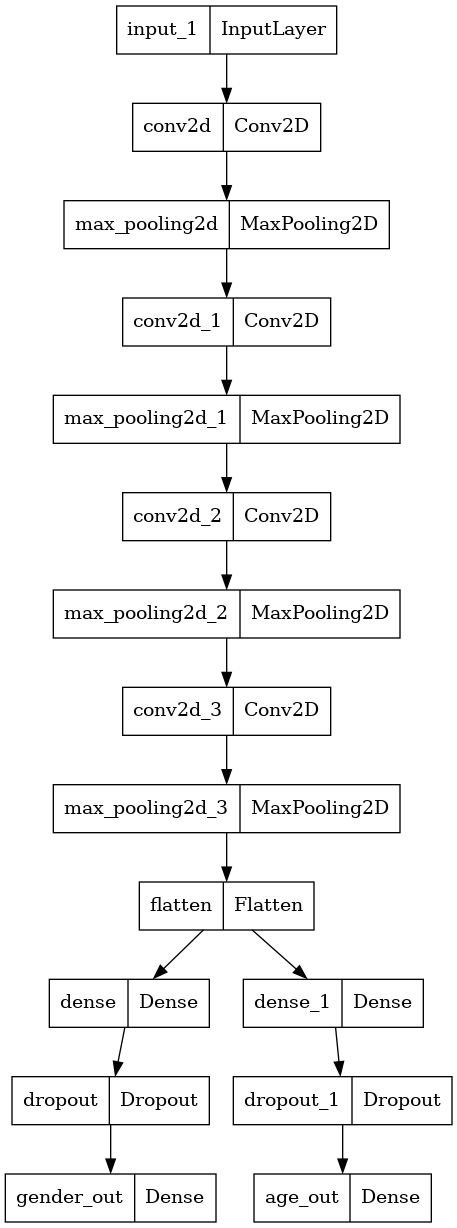

In [22]:
# plot the modl
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96)

In [23]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 16s 16ms/step - loss: 15.5053 - gender_out_loss: 0.6786 - age_out_loss: 14.8267 - gender_out_accuracy: 0.5704 - age_out_accuracy: 0.0472 - val_loss: 12.0362 - val_gender_out_loss: 0.5225 - val_age_out_loss: 11.5138 - val_gender_out_accuracy: 0.7431 - val_age_out_accuracy: 0.0441
Epoch 2/30
593/593 [==============================] - 9s 15ms/step - loss: 11.5463 - gender_out_loss: 0.4747 - age_out_loss: 11.0716 - gender_out_accuracy: 0.7738 - age_out_accuracy: 0.0284 - val_loss: 10.0530 - val_gender_out_loss: 0.4383 - val_age_out_loss: 9.6147 - val_gender_out_accuracy: 0.7925 - val_age_out_accuracy: 0.0110
Epoch 3/30
593/593 [==============================] - 8s 14ms/step - loss: 10.1644 - gender_out_loss: 0.4172 - age_out_loss: 9.7473 - gender_out_accuracy: 0.8020 - age_out_accuracy: 0.0130 - val_loss: 8.8572 - val_gender_out_loss: 0.3896 - val_age_out_loss: 8.4676 - val_gender_out_accuracy: 0.8180 - val_age_out_accuracy: 0.0105
Epoc

In [28]:
from sklearn.metrics import classification_report
#use model to make predictions on test data
y_pred = model.predict(x_test)
#print classification report for model
print(classification_report(y, y_pred))

75/75 [==============================] - 0s 3ms/step


ValueError: Found input variables with inconsistent numbers of samples: [23708, 2]

# Plot the results

<Figure size 640x480 with 0 Axes>

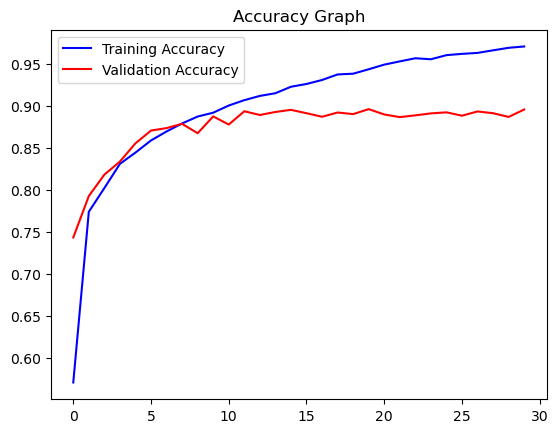

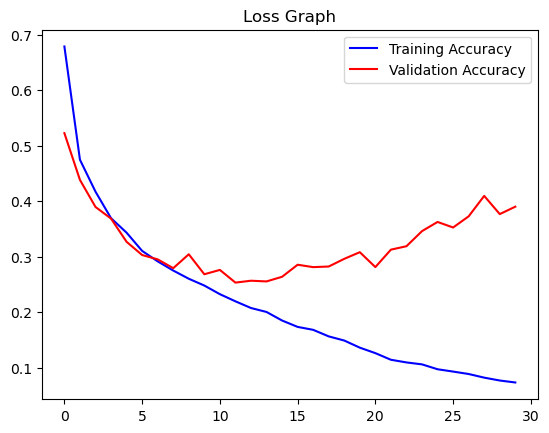

<Figure size 640x480 with 0 Axes>

In [24]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
plt.figure()

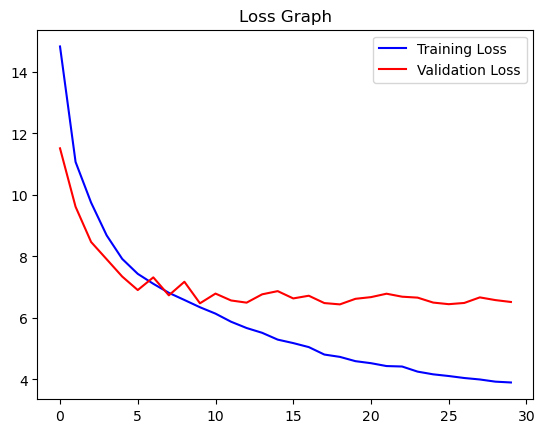

In [25]:
# plot results for loss age because Age is a continuous value, we should look at mse or loss for age 

loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### 2. VGG16:

In [21]:
# load model without classifier layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128,3))
for layer in base_model.layers:
    layer.trainable = False
# add new classifier layers
gender_x = base_model.output
gender_x = Flatten()(gender_x)
gender_x = Dropout(0.5)(gender_x)
gender_x = Dense(256, activation='relu')(gender_x)
output_gender = Dense(1, activation='sigmoid',name='gender_output')(gender_x)

age_x = base_model.output
age_x = Flatten()(age_x)
age_x = Dropout(0.5)(age_x)
age_x = Dense(256, activation='relu')(age_x)
output_age = Dense(1, activation='relu',name='age_output')(age_x)
# define new model
model_vgg16 = Model(inputs=base_model.inputs, outputs=[output_gender, output_age])


model_vgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                           

In [22]:
Adam  = optimizers.Adam(learning_rate=0.001)
model_vgg16.compile(loss=['binary_crossentropy', 'mae'], optimizer=Adam, metrics=['accuracy'])

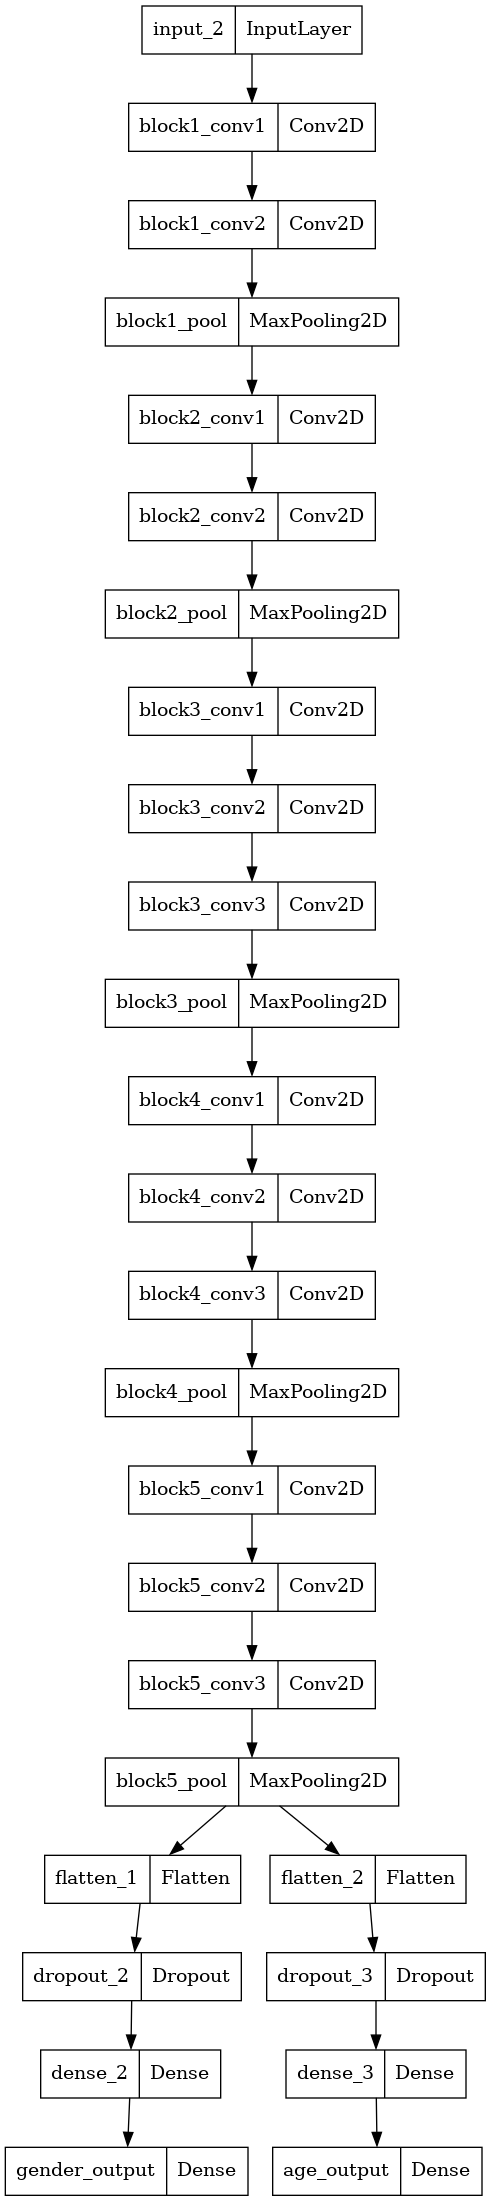

In [23]:
# plot the modl
from tensorflow.keras.utils import plot_model
plot_model(model_vgg16,to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96)

In [28]:
x.shape

(23708, 128, 128, 3)

In [29]:
# train model
history_model_vgg16 = model_vgg16.fit(x=x, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 21s 32ms/step - loss: 11.8903 - gender_output_loss: 0.7646 - age_output_loss: 11.1257 - gender_output_accuracy: 0.8079 - age_output_accuracy: 0.0113 - val_loss: 8.7620 - val_gender_output_loss: 0.3247 - val_age_output_loss: 8.4373 - val_gender_output_accuracy: 0.8471 - val_age_output_accuracy: 0.0044
Epoch 2/30
593/593 [==============================] - 19s 32ms/step - loss: 9.3022 - gender_output_loss: 0.3256 - age_output_loss: 8.9766 - gender_output_accuracy: 0.8553 - age_output_accuracy: 0.0052 - val_loss: 8.4634 - val_gender_output_loss: 0.3034 - val_age_output_loss: 8.1600 - val_gender_output_accuracy: 0.8667 - val_age_output_accuracy: 0.0070
Epoch 3/30
593/593 [==============================] - 17s 29ms/step - loss: 8.7920 - gender_output_loss: 0.2996 - age_output_loss: 8.4923 - gender_output_accuracy: 0.8685 - age_output_accuracy: 0.0043 - val_loss: 8.3800 - val_gender_output_loss: 0.3035 - val_age_output_loss: 8.0764 - val_g

<Figure size 640x480 with 0 Axes>

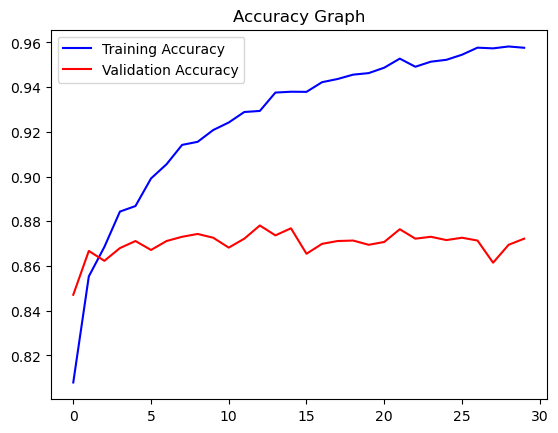

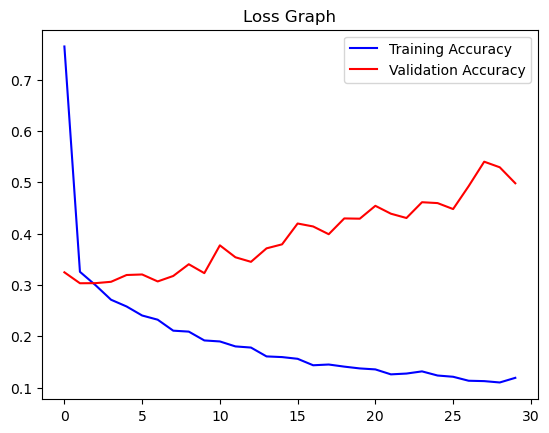

<Figure size 640x480 with 0 Axes>

In [32]:
acc = history_model_vgg16.history['gender_output_accuracy']
val_acc = history_model_vgg16.history['val_gender_output_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_model_vgg16.history['gender_output_loss']
val_loss = history_model_vgg16.history['val_gender_output_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
plt.figure()

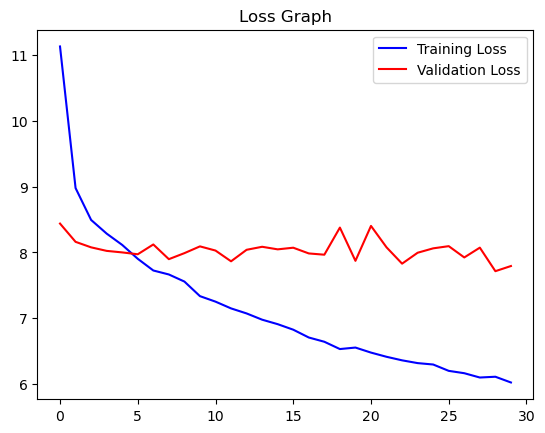

In [33]:
# plot results for loss age because Age is a continuous value, we should look at mse or loss for age 

loss = history_model_vgg16.history['age_output_loss']
val_loss = history_model_vgg16.history['val_age_output_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### 3. VGG19 :

In [24]:
Vgg19_model = VGG19(include_top=False,weights="imagenet")

80134624/80134624 [==============================] - 1s 0us/step


In [25]:
Vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
for layer in Vgg19_model.layers:
    layer.trainable = False

In [27]:
# load model without classifier layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128,3))
for layer in base_model.layers:
    layer.trainable = False
# add new classifier layers
gender_x = base_model.output
gender_x = Flatten()(gender_x)
gender_x = Dropout(0.5)(gender_x)
gender_x = Dense(256, activation='relu')(gender_x)
output_gender = Dense(1, activation='sigmoid',name='gender_output')(gender_x)

age_x = base_model.output
age_x = Flatten()(age_x)
age_x = Dropout(0.5)(age_x)
age_x = Dense(256, activation='relu')(age_x)
output_age = Dense(1, activation='relu',name='age_output')(age_x)
# define new model
model_vgg19 = Model(inputs=base_model.inputs, outputs=[output_gender, output_age])


model_vgg19.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [28]:
Adam  = optimizers.Adam(learning_rate=0.003)
model_vgg19.compile(loss=['binary_crossentropy', 'mae'], optimizer=Adam, metrics=['accuracy'])

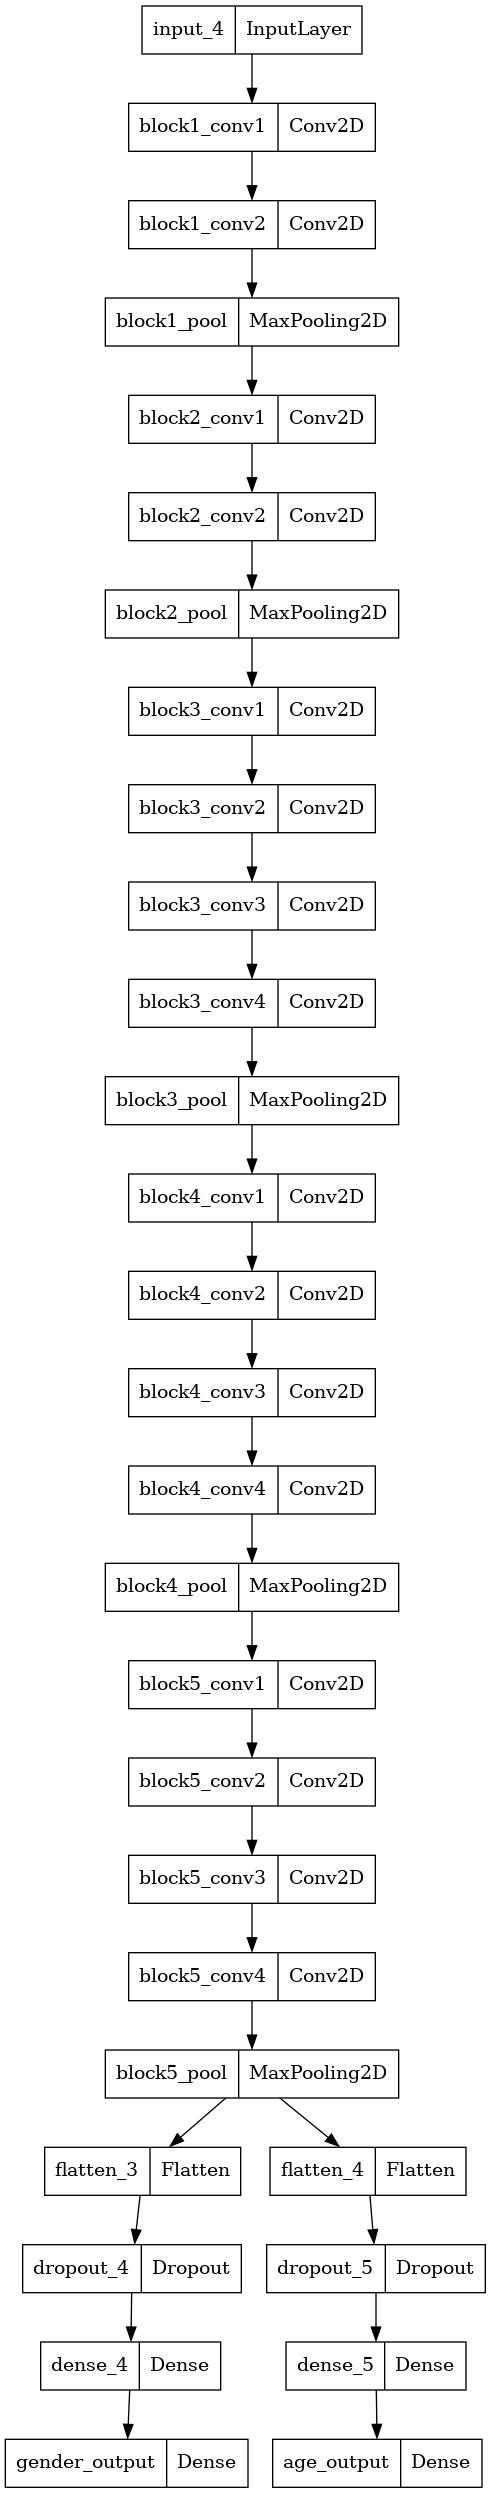

In [29]:
# plot the modl
from tensorflow.keras.utils import plot_model
plot_model(model_vgg19,to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96)

In [39]:
history_model_vgg19 = model_vgg19.fit(x=x, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 24s 38ms/step - loss: 34.9519 - gender_output_loss: 0.9676 - age_output_loss: 33.9843 - gender_output_accuracy: 0.8190 - age_output_accuracy: 2.1090e-04 - val_loss: 33.5855 - val_gender_output_loss: 0.3335 - val_age_output_loss: 33.2520 - val_gender_output_accuracy: 0.8545 - val_age_output_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 22s 37ms/step - loss: 33.6544 - gender_output_loss: 0.3380 - age_output_loss: 33.3164 - gender_output_accuracy: 0.8510 - age_output_accuracy: 0.0000e+00 - val_loss: 33.5694 - val_gender_output_loss: 0.3174 - val_age_output_loss: 33.2520 - val_gender_output_accuracy: 0.8621 - val_age_output_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 20s 34ms/step - loss: 33.6355 - gender_output_loss: 0.3191 - age_output_loss: 33.3164 - gender_output_accuracy: 0.8550 - age_output_accuracy: 0.0000e+00 - val_loss: 33.5887 - val_gender_output_loss: 0.3367 - val_ag

<Figure size 640x480 with 0 Axes>

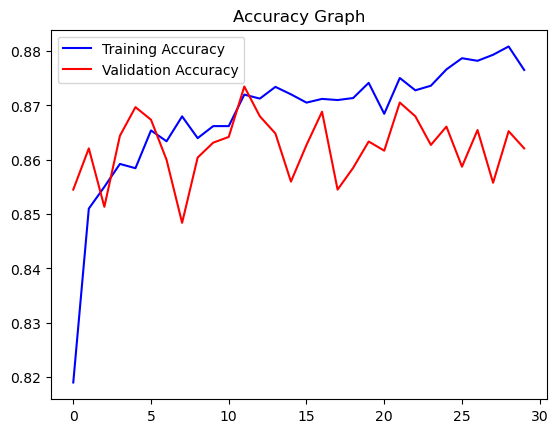

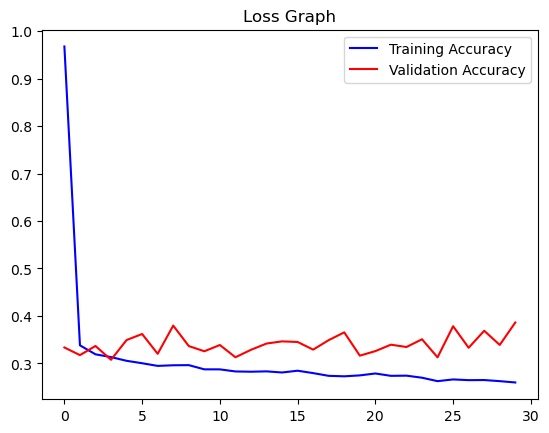

<Figure size 640x480 with 0 Axes>

In [40]:
acc = history_model_vgg19.history['gender_output_accuracy']
val_acc = history_model_vgg19.history['val_gender_output_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_model_vgg19.history['gender_output_loss']
val_loss = history_model_vgg19.history['val_gender_output_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
plt.figure()

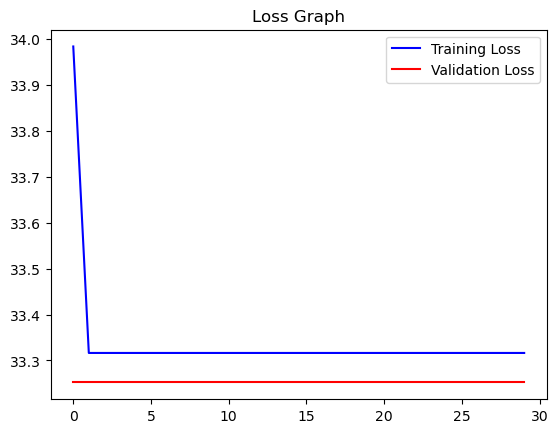

In [41]:
# plot results for loss age because Age is a continuous value, we should look at mse or loss for age 

loss = history_model_vgg19.history['age_output_loss']
val_loss = history_model_vgg19.history['val_age_output_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

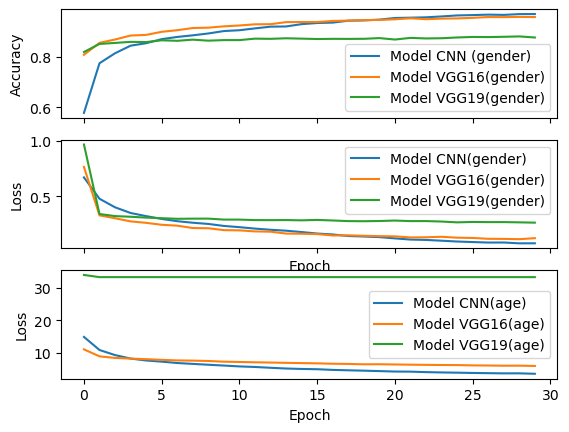

In [45]:
# In[15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# Plot the accuracy curves on the first subplot
ax1.plot(history.history['gender_out_accuracy'], label='Model CNN (gender)')
ax1.plot(history_model_vgg16.history['gender_output_accuracy'], label='Model VGG16(gender)')
ax1.plot(history_model_vgg19.history['gender_output_accuracy'], label='Model VGG19(gender)')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the loss curves on the second subplot
ax2.plot(history.history['gender_out_loss'], label='Model CNN(gender)')
ax2.plot(history_model_vgg16.history['gender_output_loss'], label='Model VGG16(gender)')
ax2.plot(history_model_vgg19.history['gender_output_loss'], label='Model VGG19(gender)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Plot the loss curves on the third subplot
ax3.plot(history.history['age_out_loss'], label='Model CNN(age)')
ax3.plot(history_model_vgg16.history['age_output_loss'], label='Model VGG16(age)')
ax3.plot(history_model_vgg19.history['age_output_loss'], label='Model VGG19(age)')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()

# Show the plot
plt.show()

## Prediction with test Data

Original Gender: Female Original Age: 3
1/1 [==============================] - 0s 171ms/step
Predicted Gender: Female Predicted Age: 2


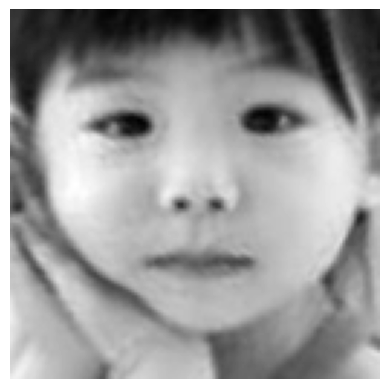

In [32]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 28
1/1 [==============================] - 0s 24ms/step
Predicted Gender: Male Predicted Age: 31


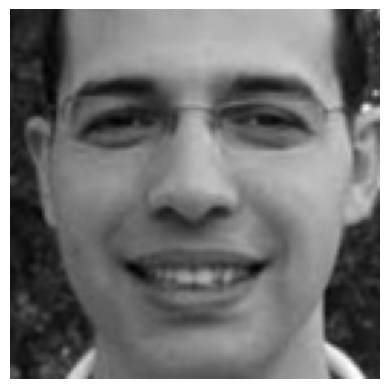

In [33]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 42
1/1 [==============================] - 0s 21ms/step
Predicted Gender: Male Predicted Age: 42


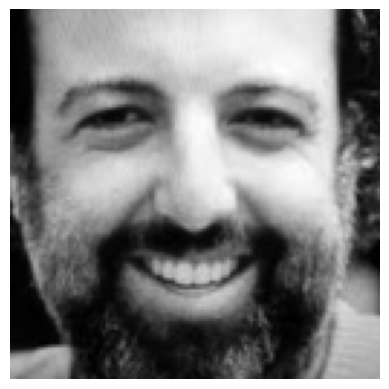

In [34]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [36]:
model.save('my_model.h5')